# Conflicts time-series dataset released by ACLED

Link to Conflicts data released by ACLED: https://www.acleddata.com/data/

For more details about the data: https://www.acleddata.com/resources/general-guides/

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ntpath
import glob
plt.style.use("ggplot")

In [2]:
# Read the data released by ACLED regarding the conflicts indicator.
path = "./wfp_data/"
all_files = glob.glob(path + "*.csv")

dfs = []

for filename in all_files:
    df = pd.read_csv(filename)
    df["Country"] = ntpath.basename(filename).split(".")[0]
    dfs.append(df)

df = pd.concat(dfs, axis = 0, ignore_index = True)
df.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,Country
0,6982420,854,BFO3548,3548,07 March 2020,2020,1,Protests,Peaceful protest,Protesters (Burkina Faso),...,13.3258,-1.5347,1,MinuteBf,New media,"On 7 March 2020, a large number of workers and...",0,1583789987,BFA,Burkina Faso
1,6982210,854,BFO3552,3552,07 March 2020,2020,1,Protests,Peaceful protest,Protesters (Burkina Faso),...,12.2494,-0.6153,1,AIB (Burkina Faso),National,"On 7 March 2020, workers staged a protest marc...",0,1583789987,BFA,Burkina Faso
2,6982248,854,BFO3543,3543,07 March 2020,2020,1,Protests,Peaceful protest,Protesters (Burkina Faso),...,10.3300,-3.1800,1,Bafuji Infos,Subnational,"On 7 March 2020, a large number of workers and...",0,1583789987,BFA,Burkina Faso
3,6982260,854,BFO3545,3545,07 March 2020,2020,1,Protests,Peaceful protest,Protesters (Burkina Faso),...,11.4909,-3.5217,1,Burkina24,National,"On 7 March 2020, a large number of workers sta...",0,1583789987,BFA,Burkina Faso
4,6982305,854,BFO3550,3550,07 March 2020,2020,1,Protests,Peaceful protest,Protesters (Burkina Faso),...,13.5828,-2.4216,1,Faso Nord,Subnational,"On 7 March 2020, a large number of workers, am...",0,1583789987,BFA,Burkina Faso


### Brief items description

- *data_id*: an individual date numeric	identifier.
- *iso*: a numeric code	for	each individual	country.
- *event_id_cnty*: an individual identifier	by number and country acronym (updated annually).
- *event_id_no_cnty*: an individual	numeric	identifier (updated	annually).
- *event_date*: the	day, month and year	on which an	event took place.
- *year*: the year in which	an event took place.
- *time_precision*: a numeric code indicating the level	of certainty of	the	date coded for the event.
- *event_type*: the	type of	event.
- *sub_event_type*: the	type of	sub-event.
- *actor1*: the	named actor	involved in	the	event.
- *assoc_actor_1*: the named actor associated with or identifying actor1.
- *inter1*: a numeric code indicating the type of actor1.
- *actor2*: the	named actor	involved in	the	event.
- *assoc_actor_2*: the named actor associated with or identifying actor2.
- *inter2*: a numeric code indicating the type of actor2.
- *interaction*: a numeric code	indicating the interaction between types of	actor1 and actor2.
- *region*: the	region of the world	where the event	took place.
- *country*: the country in	which the event	took place.
- *admin1*: the	largest	sub-national administrative	region in which	the	event took place.
- *admin2*: the	second largest sub-national	administrative region in which the event took place.
- *admin3*: the	third largest sub-national administrative region in	which the event	too place.
- *location*: the location in which	the	event took place.
- *latitude*: the latitude of the location.
- *longitude*: the longitude of	the	location.
- *geo_precision*: a numeric code indicating the level of certainty	of the location coded for the event.
- *source*: the	source of the event	report.
- *source scale*: the scale	(local,	regional, national,	international) of the source.
- *notes*: a short description of the event.
- *fatalities*: the	number of reported fatalities which	occurred during	the	event.

ACLED currently	codes six types	of events, both	violent	and	non-violent, that may occur during a conflict. These include:
- *Battles*: violent interactions between two organised armed groups;
- *Explosions/Remote violence*: one-sided violence events in which the tool for	engaging in	conflict creates asymmetry by taking away the ability of the target	to respond;
- *Violence against civilians*: violent	events where an	organised armed	group deliberately inflicts	violence upon unarmed non-combatants;
- *Protests*: a public demonstration against a political entity, government	institution, policy	or group in	which the participants are not violent;
- *Riots*: violent events where	demonstrators or mobs engage in	disruptive acts	or disorganised	acts of	violence against property or people;
- *Strategic development*: accounts	for often non-violent activity by conflict and other agents	within the context of the war/dispute. Recruitment,	looting	and	arrests	are	included.

In [3]:
# Keep only some features/items and raname them.
df = df[["Country", "event_date", "event_type", "sub_event_type", "admin1", "fatalities"]]
df.rename(columns = {"event_date": "Datetime", "event_type": "Event type", "sub_event_type": "Subevent type", "admin1": "AdminStrata", "fatalities": "Fatalities"}, inplace = True)
df.head()

,Country,Datetime,Event type,Subevent type,AdminStrata,Fatalities
0,Burkina Faso,07 March 2020,Protests,Peaceful protest,Centre-Nord,0
1,Burkina Faso,07 March 2020,Protests,Peaceful protest,Plateau-Central,0
2,Burkina Faso,07 March 2020,Protests,Peaceful protest,Sud-Ouest,0
3,Burkina Faso,07 March 2020,Protests,Peaceful protest,Hauts-Bassins,0
4,Burkina Faso,07 March 2020,Protests,Peaceful protest,Nord,0


In [4]:
print("The countries are:", ", ".join(df.Country.unique()))

The countries are: Burkina Faso, Nigeria, Syria, Yemen


### Preprocessing

In [5]:
# Rename the name of some AdminStrata according to the fcs and rcsi names of the AdminStrata.
df.replace(["Lahij", "Sanaa", "Sadah", "Hadramawt", "Al Mahrah", "Suqutra", "Ad Dali"], ["Lahj", "Sana'a", "Sa'ada", "Hadramaut", "Al Maharah", "Socotra", "Al Dhale'e"], inplace = True)
df.replace(["Idleb"], ["Idlib"], inplace = True)
df.replace(["Boucle du Mouhoun"], ["Boucle-Du-Mouhoun"], inplace = True)

In [6]:
# Convert to an appropriate datetime format.
df["Datetime"] = pd.to_datetime(df.Datetime)
df.sort_values("Datetime", ascending = True, inplace = True) # Sort on datetime.
df.reset_index(drop = True, inplace = True)
df.head()

,Country,Datetime,Event type,Subevent type,AdminStrata,Fatalities
0,Yemen,2018-01-01,Battles,Armed clash,Sa'ada,3
1,Nigeria,2018-01-01,Violence against civilians,Attack,Benue,6
2,Nigeria,2018-01-01,Violence against civilians,Attack,Benue,6
3,Nigeria,2018-01-01,Violence against civilians,Attack,Benue,6
4,Nigeria,2018-01-01,Violence against civilians,Attack,Benue,6


In [7]:
# Check if the dataframe contains NaN values.
df.isnull().sum()

Country          0
Datetime         0
Event type       0
Subevent type    0
AdminStrata      0
Fatalities       0
dtype: int64

In [8]:
# Create appropriate time-series subgroups with an appropriate datetime object resampled to day. 
df = df.groupby(["Country", "AdminStrata", "Event type", "Subevent type"]).apply(lambda group: group.set_index("Datetime").resample("D").mean()).reset_index()
df.reset_index(drop = True, inplace = True)
df.head()

,Country,AdminStrata,Event type,Subevent type,Datetime,Fatalities
0,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2018-01-01,0.0
1,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2018-01-02,NaN
2,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2018-01-03,NaN
3,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2018-01-04,NaN
4,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2018-01-05,NaN


In [9]:
# Create a dataframe with multindex column in order to have a summary dataframe of the time-series.
df = df.set_index(["Datetime", "Country", "AdminStrata", "Event type", "Subevent type"]).unstack(["Country", "AdminStrata", "Event type", "Subevent type"])
df.columns = df.columns.droplevel(0)
freq = "D"
df.index.freq = freq
df.head()

Country            Burkina Faso                                \
AdminStrata   Boucle-Du-Mouhoun                                 
Event type              Battles    Explosions/Remote violence   
Subevent type       Armed clash Remote explosive/landmine/IED   
Datetime                                                        
2018-01-01                  0.0                           NaN   
2018-01-02                  NaN                           NaN   
2018-01-03                  NaN                           NaN   
2018-01-04                  NaN                           NaN   
2018-01-05                  NaN                           NaN   

Country                                                            \
AdminStrata                                                         
Event type            Protests        Riots                         
Subevent type Peaceful protest Mob violence Violent demonstration   
Datetime                                                            
2018-01-01                 NaN          NaN                   NaN   
2018-01-02                 NaN          NaN                   NaN   
2018-01-03                 NaN          NaN                   NaN   
2018-01-04                 NaN          NaN                   NaN   
2018-01-05                 NaN          NaN                   NaN   

Country                                                            \
AdminStrata                                                         
Event type    Strategic developments                                
Subevent type  Disrupted weapons use Looting/property destruction   
Datetime                                                            
2018-01-01                       NaN                          NaN   
2018-01-02                       NaN                          NaN   
2018-01-03                       NaN                          NaN   
2018-01-04                       NaN                          NaN   
2018-01-05                       NaN                          NaN   

Country                                                          ...  \
AdminStrata                                            Cascades  ...   
Event type        Violence against civilians            Battles  ...   
Subevent type Abduction/forced disappearance Attack Armed clash  ...   
Datetime                                                         ...   
2018-01-01                               NaN    NaN         NaN  ...   
2018-01-02                               NaN    NaN         NaN  ...   
2018-01-03                               NaN    NaN         NaN  ...   
2018-01-04                               NaN    NaN         NaN  ...   
2018-01-05                               NaN    NaN         NaN  ...   

Country                        Yemen                           \
AdminStrata                    Taizz                            
Event type    Strategic developments                            
Subevent type                Arrests Change to group/activity   
Datetime                                                        
2018-01-01                       NaN                      NaN   
2018-01-02                       NaN                      NaN   
2018-01-03                       NaN                      NaN   
2018-01-04                       NaN                      NaN   
2018-01-05                       NaN                      NaN   

Country                                                               \
AdminStrata                                                            
Event type                                                             
Subevent type Disrupted weapons use Headquarters or base established   
Datetime                                                               
2018-01-01                      NaN                              NaN   
2018-01-02                      NaN                              NaN   
2018-01-03                      NaN                              NaN   
2018-01-04         

In [10]:
df.to_csv("./time-series/wfp_fatalities_subevent.csv", index_label = False)

N.B. The NaN values must be fill with the value 0 (0 fatalities ascertained by the survey).

In [11]:
# Reduce the Event tanking only the 'Event type' summing the corresponding 'Subevent type'.
df = df.groupby(level = [0, 1, 2], axis = 1).sum()
df.head()

Country          Burkina Faso                                            \
AdminStrata Boucle-Du-Mouhoun                                             
Event type            Battles Explosions/Remote violence Protests Riots   
Datetime                                                                  
2018-01-01                0.0                        0.0      0.0   0.0   
2018-01-02                0.0                        0.0      0.0   0.0   
2018-01-03                0.0                        0.0      0.0   0.0   
2018-01-04                0.0                        0.0      0.0   0.0   
2018-01-05                0.0                        0.0      0.0   0.0   

Country                                                                 \
AdminStrata                                                   Cascades   
Event type  Strategic developments Violence against civilians  Battles   
Datetime                                                                 
2018-01-01                     0.0                        0.0      0.0   
2018-01-02                     0.0                        0.0      0.0   
2018-01-03                     0.0                        0.0      0.0   
2018-01-04                     0.0                        0.0      0.0   
2018-01-05                     0.0                        0.0      0.0   

Country                                                ...  \
AdminStrata                                            ...   
Event type  Explosions/Remote violence Protests Riots  ...   
Datetime                                               ...   
2018-01-01                         0.0      0.0   0.0  ...   
2018-01-02                         0.0      0.0   0.0  ...   
2018-01-03                         0.0      0.0   0.0  ...   
2018-01-04                         0.0      0.0   0.0  ...   
2018-01-05                         0.0      0.0   0.0  ...   

Country                          Yemen                   \
AdminStrata                    Shabwah Socotra            
Event type  Violence against civilians Battles Protests   
Datetime                                                  
2018-01-01                         0.0     0.0      0.0   
2018-01-02                         0.0     0.0      0.0   
2018-01-03                         0.0     0.0      0.0   
2018-01-04                         0.0     0.0      0.0   
2018-01-05                         0.0     0.0      0.0   

Country                                                                \
AdminStrata                          Taizz                              
Event type  Strategic developments Battles Explosions/Remote violence   
Datetime                                                                
2018-01-01                     0.0     0.0                   5.000000   
2018-01-02                     0.0     0.0                   5.000000   
2018-01-03                     0.0     0.0                   0.000000   
2018-01-04                     0.0    10.0                   0.000000   
2018-01-05                     0.0     0.0                   4.666667   

Country                                                                       
AdminStrata                                                                   
Event type  Protests Riots Strategic developments Violence against civilians  
Datetime                                                                      
2018-01-01       0.0   0.0                    0.0                        0.0  
2018-01-02       0.0   0.0                    0.0                        0.0  
2018-01-03       0.0   0.0                    0.0                        0.0  
2018-01-04       0.0   0.0                    0.0                        0.0  
2018-01-05       0.0   0.0                    0.0                        0.0  

[5 rows x 460 columns]

In [12]:
df.to_csv("./time-series/wfp_fatalities_event.csv", index_label = False)

## Example

In [13]:
# Select country.
Country = "Yemen"

In [14]:
df = df[Country]
df.head()

AdminStrata   Abyan                                            \
Event type  Battles Explosions/Remote violence Protests Riots   
Datetime                                                        
2018-01-01      0.0                        0.0      0.0   0.0   
2018-01-02      0.0                        0.0      0.0   0.0   
2018-01-03      0.0                        0.0      0.0   0.0   
2018-01-04      0.0                        0.0      0.0   0.0   
2018-01-05      0.0                        0.0      0.0   0.0   

AdminStrata                                                      Aden  \
Event type  Strategic developments Violence against civilians Battles   
Datetime                                                                
2018-01-01                     0.0                        0.0     0.0   
2018-01-02                     0.0                        0.0     0.0   
2018-01-03                     0.0                        0.0     0.0   
2018-01-04                     0.0                        0.0     0.0   
2018-01-05                     0.0                        0.0     0.0   

AdminStrata                                            ...  \
Event type  Explosions/Remote violence Protests Riots  ...   
Datetime                                               ...   
2018-01-01                         0.0      0.0   0.0  ...   
2018-01-02                         0.0      0.0   0.0  ...   
2018-01-03                         1.0      0.0   0.0  ...   
2018-01-04                         0.0      0.0   0.0  ...   
2018-01-05                         0.0      0.0   0.0  ...   

AdminStrata                    Shabwah Socotra           \
Event type  Violence against civilians Battles Protests   
Datetime                                                  
2018-01-01                         0.0     0.0      0.0   
2018-01-02                         0.0     0.0      0.0   
2018-01-03                         0.0     0.0      0.0   
2018-01-04                         0.0     0.0      0.0   
2018-01-05                         0.0     0.0      0.0   

AdminStrata                          Taizz                             \
Event type  Strategic developments Battles Explosions/Remote violence   
Datetime                                                                
2018-01-01                     0.0     0.0                   5.000000   
2018-01-02                     0.0     0.0                   5.000000   
2018-01-03                     0.0     0.0                   0.000000   
2018-01-04                     0.0    10.0                   0.000000   
2018-01-05                     0.0     0.0                   4.666667   

AdminStrata                                                                   
Event type  Protests Riots Strategic developments Violence against civilians  
Datetime                                                                      
2018-01-01       0.0   0.0                    0.0                        0.0  
2018-01-02       0.0   0.0                    0.0                        0.0  
2018-01-03       0.0   0.0                    0.0                        0.0  
2018-01-04       0.0   0.0                    0.0                        0.0  
2018-01-05       0.0   0.0                    0.0                        0.0  

[5 rows x 122 columns]

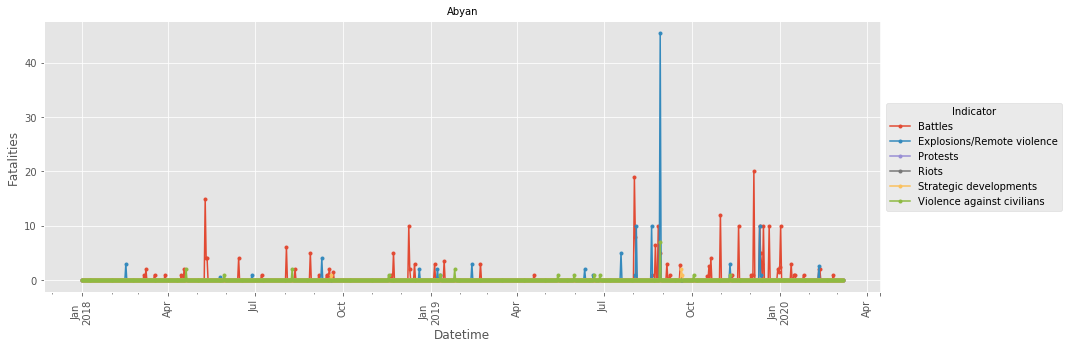

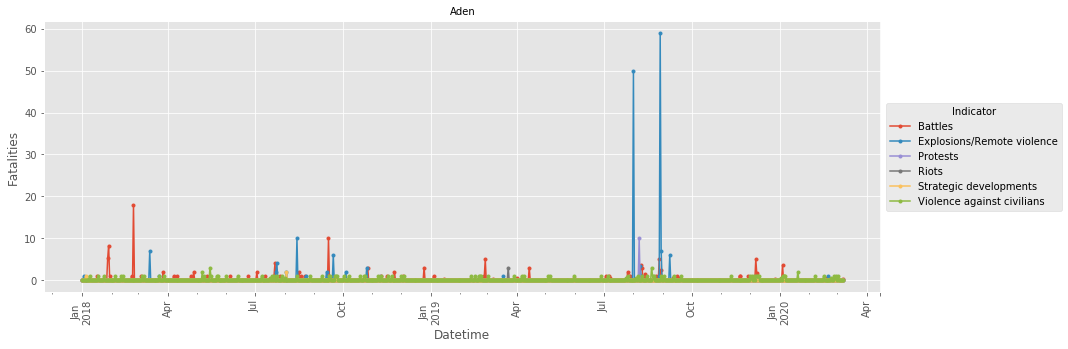

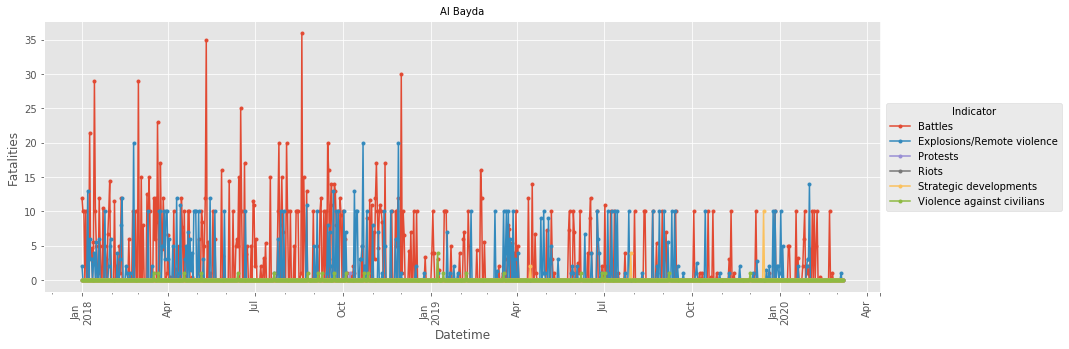

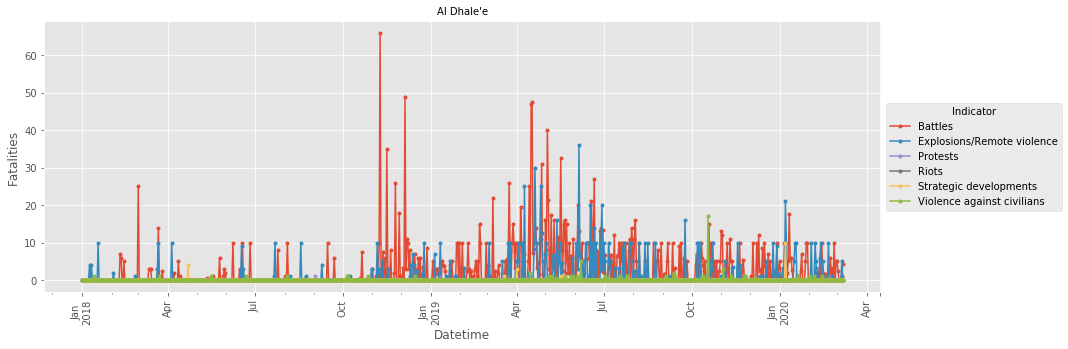

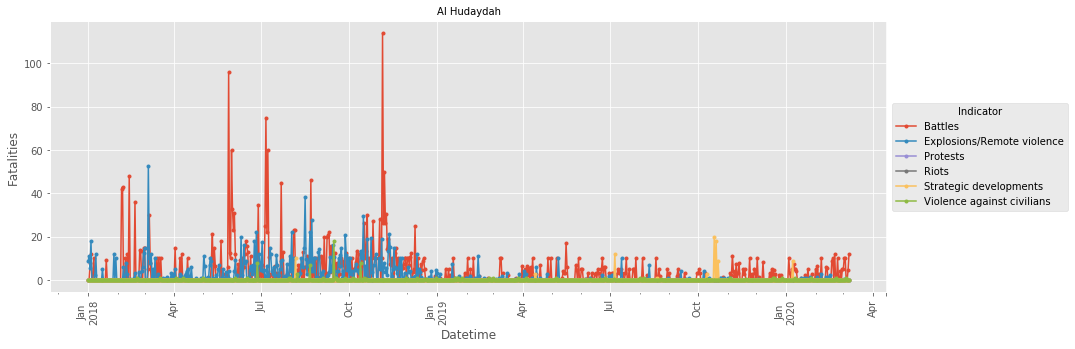

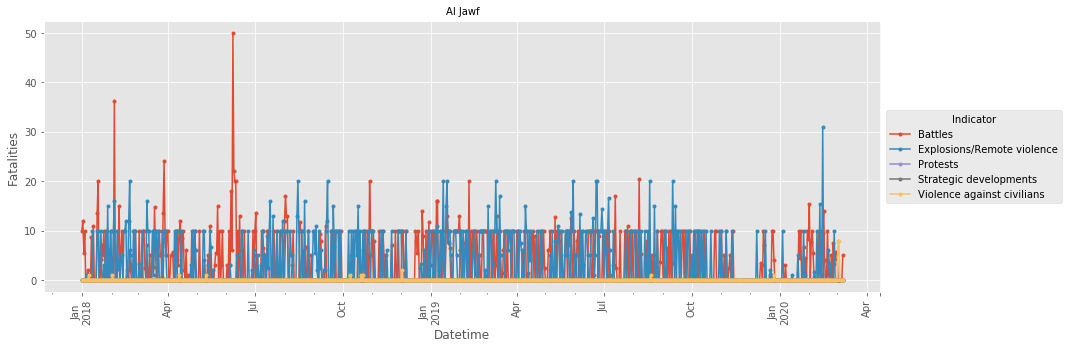

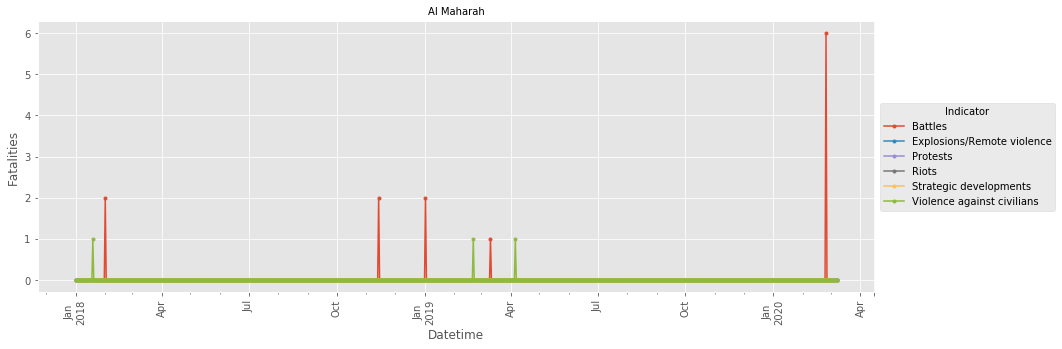

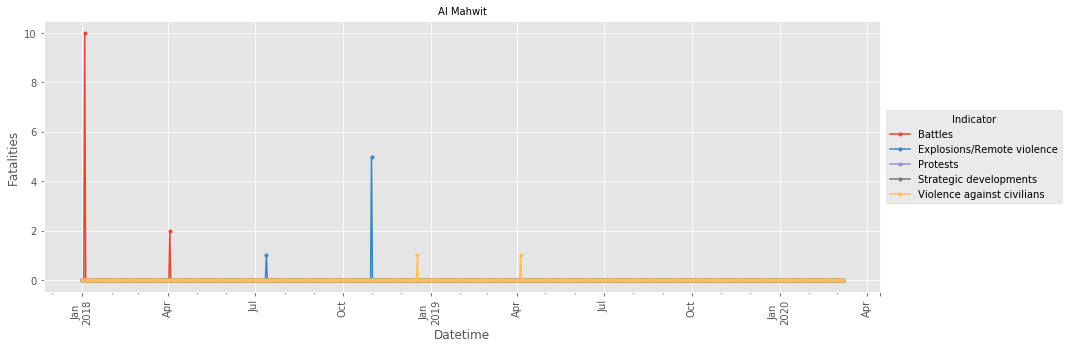

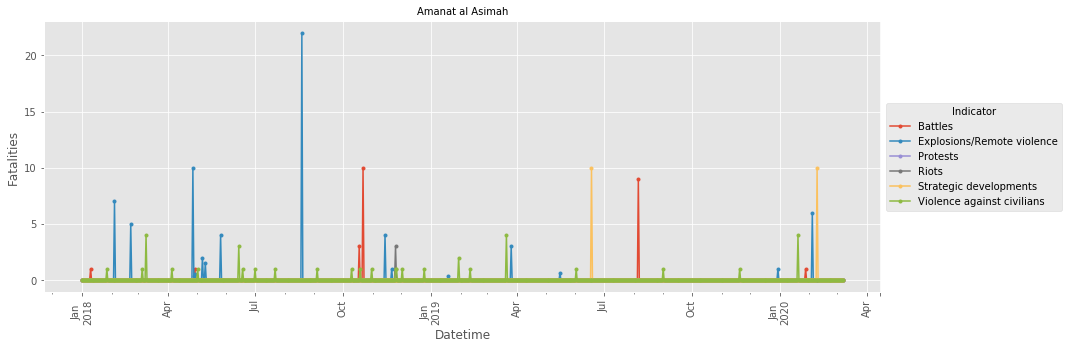

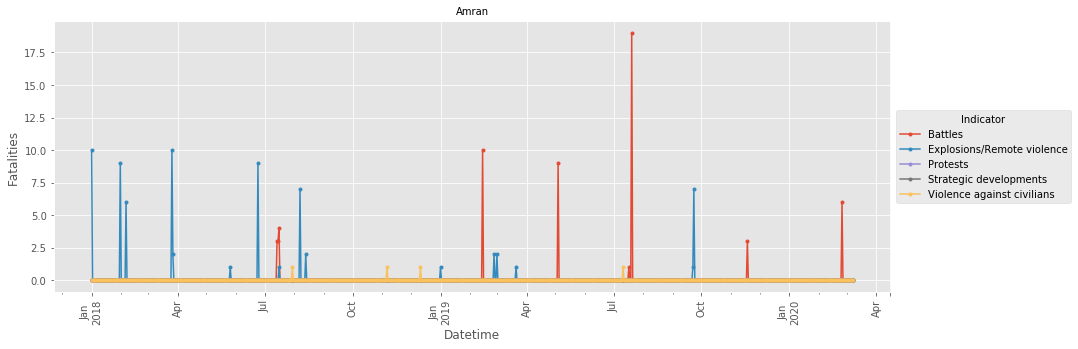

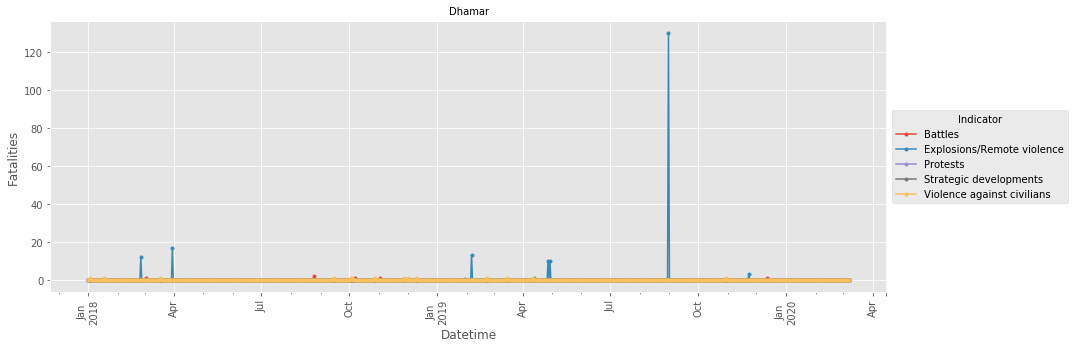

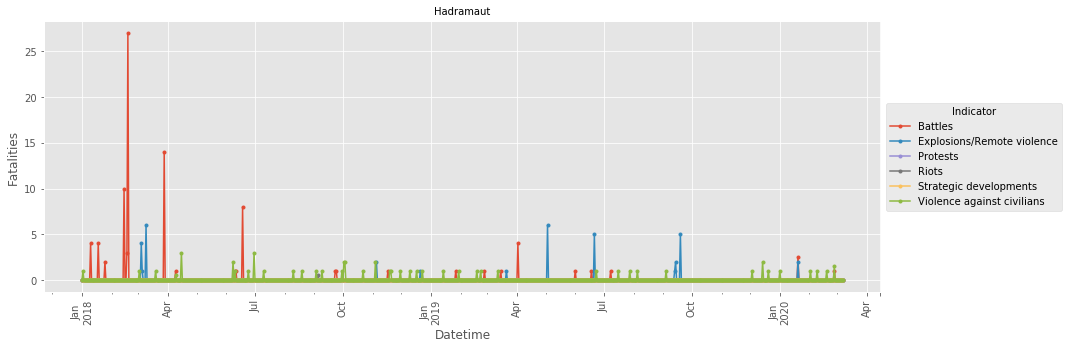

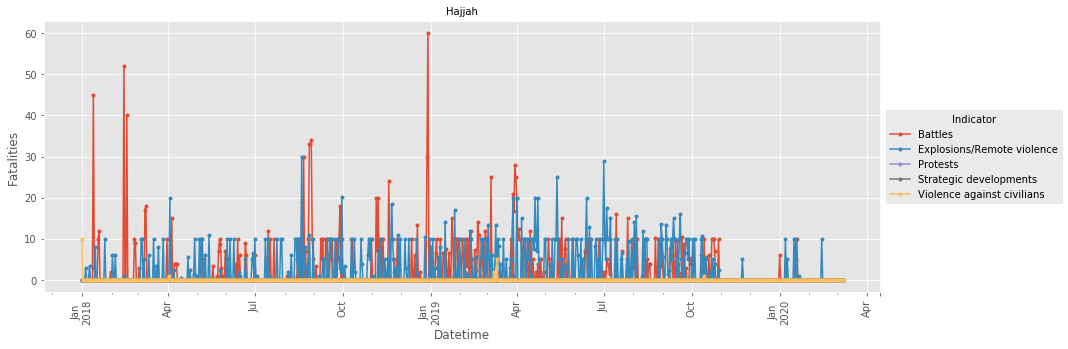

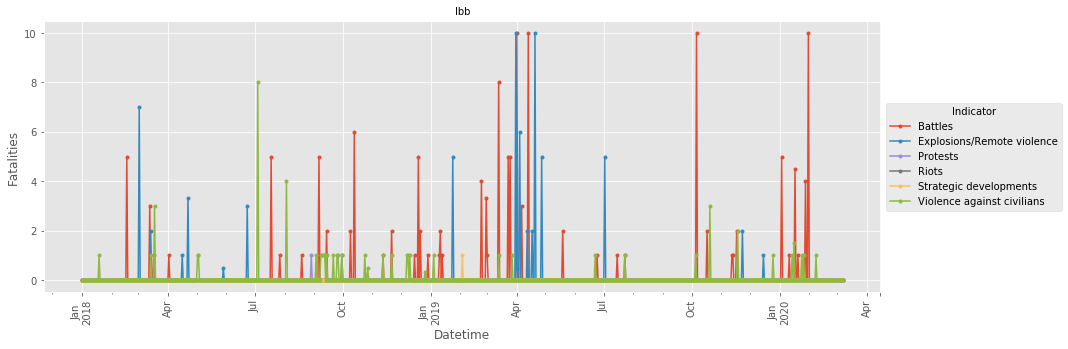

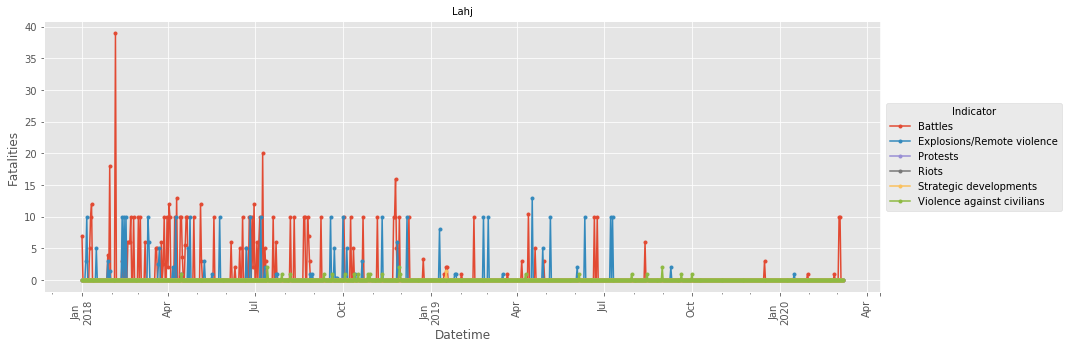

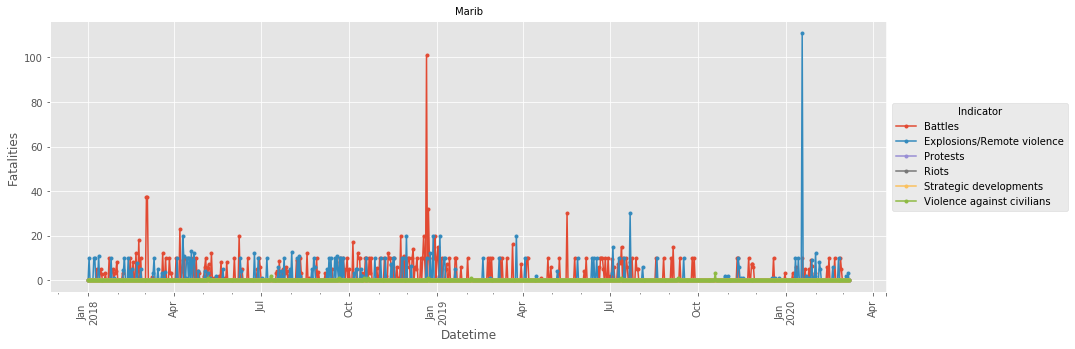

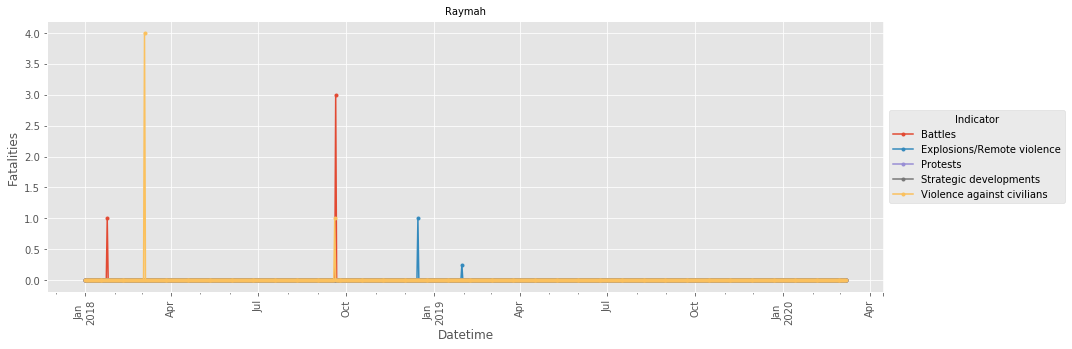

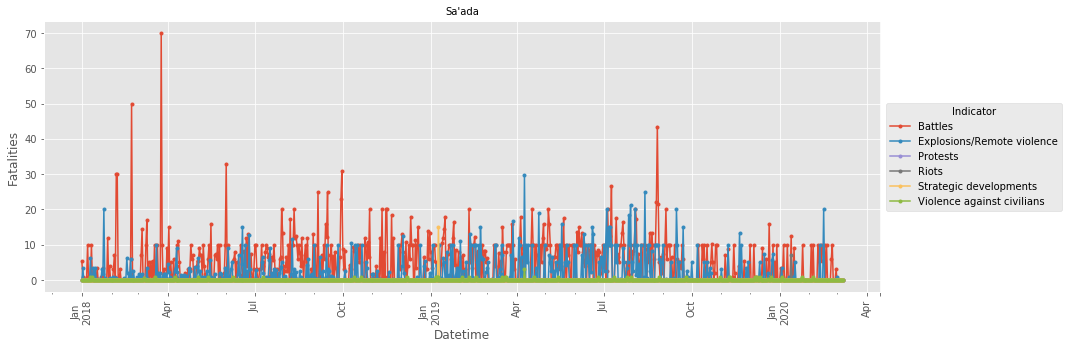

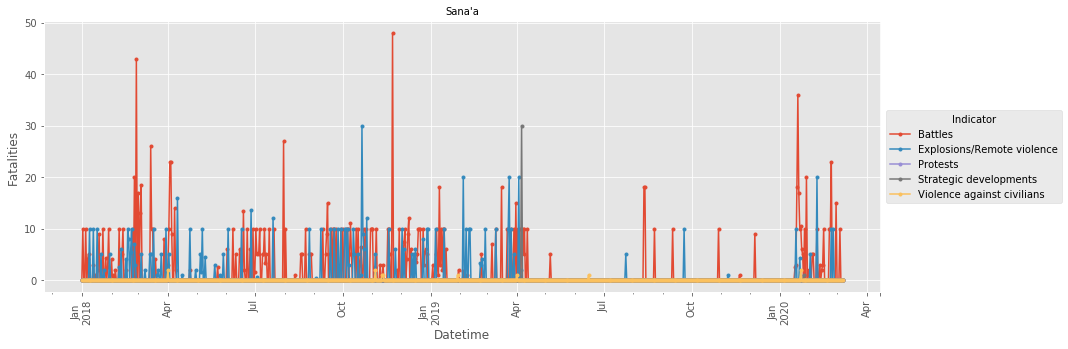

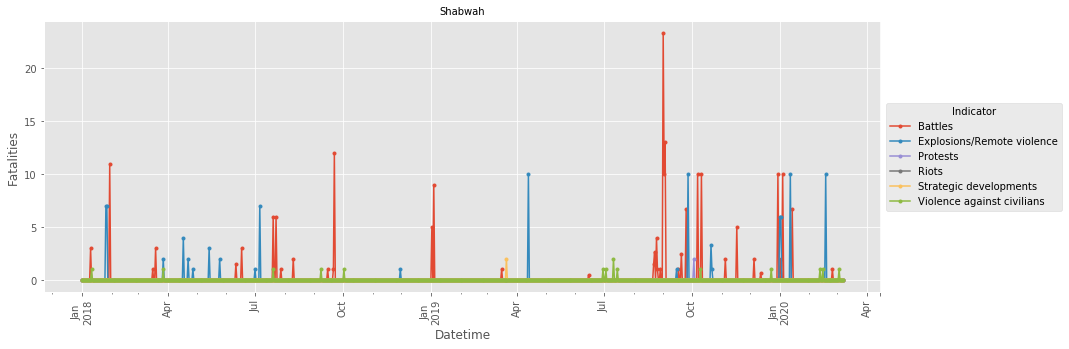

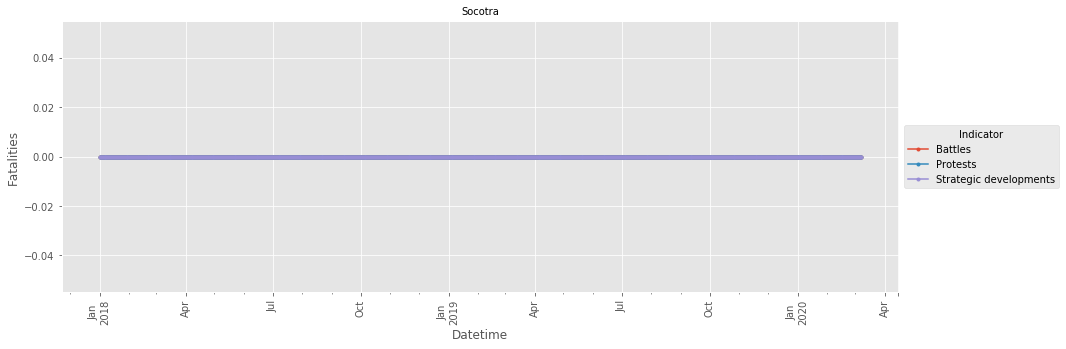

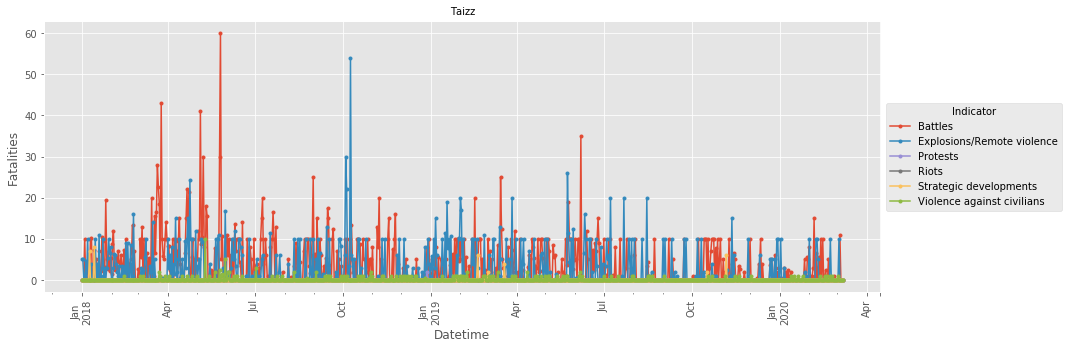

In [15]:
# Plot the time-series of the adminstrata.
def plot(group, freq, style):
    f = plt.figure(figsize = (15, 5))
    plt.title(group.columns.get_level_values(0).unique()[0], color = "black", fontsize = 10)
    group.columns = group.columns.droplevel()
    group.plot(ax = f.gca(), style = style)
    plt.legend(title = "Indicator", loc = "center left", bbox_to_anchor = (1.0, 0.5))
    plt.ylabel("Fatalities")
    plt.xticks(rotation = 90)
    plt.autoscale()
    plt.show()
    plt.close()
    
df_plot = df.groupby(axis = 1, level = 0).apply(lambda x: plot(x, df.index.freq, ".-"))

In [16]:
# Keep only the Events that are commons to each adminstrata (not considering Socotra).
df.drop(columns = "Socotra", inplace = True)

events = list()
def common_events(group):
    group.columns = group.columns.droplevel()
    events.append(list(group.columns))

df.groupby(axis = 1, level = 0).apply(common_events)
event = list(set.intersection(*map(set, events)))

In [17]:
df = df.loc[:, pd.IndexSlice[:, event]]

In [18]:
df.head()

AdminStrata   Abyan                                      \
Event type  Battles Explosions/Remote violence Protests   
Datetime                                                  
2018-01-01      0.0                        0.0      0.0   
2018-01-02      0.0                        0.0      0.0   
2018-01-03      0.0                        0.0      0.0   
2018-01-04      0.0                        0.0      0.0   
2018-01-05      0.0                        0.0      0.0   

AdminStrata                                                      Aden  \
Event type  Strategic developments Violence against civilians Battles   
Datetime                                                                
2018-01-01                     0.0                        0.0     0.0   
2018-01-02                     0.0                        0.0     0.0   
2018-01-03                     0.0                        0.0     0.0   
2018-01-04                     0.0                        0.0     0.0   
2018-01-05                     0.0                        0.0     0.0   

AdminStrata                                                             \
Event type  Explosions/Remote violence Protests Strategic developments   
Datetime                                                                 
2018-01-01                         0.0      0.0                    0.0   
2018-01-02                         0.0      0.0                    0.0   
2018-01-03                         1.0      0.0                    0.0   
2018-01-04                         0.0      0.0                    0.0   
2018-01-05                         0.0      0.0                    1.0   

AdminStrata                             ... Shabwah  \
Event type  Violence against civilians  ... Battles   
Datetime                                ...           
2018-01-01                         0.0  ...     0.0   
2018-01-02                         0.0  ...     0.0   
2018-01-03                         0.0  ...     0.0   
2018-01-04                         0.0  ...     0.0   
2018-01-05                         0.0  ...     0.0   

AdminStrata                                                             \
Event type  Explosions/Remote violence Protests Strategic developments   
Datetime                                                                 
2018-01-01                         0.0      0.0                    0.0   
2018-01-02                         0.0      0.0                    0.0   
2018-01-03                         0.0      0.0                    0.0   
2018-01-04                         0.0      0.0                    0.0   
2018-01-05                         0.0      0.0                    0.0   

AdminStrata                              Taizz                             \
Event type  Violence against civilians Battles Explosions/Remote violence   
Datetime                                                                    
2018-01-01                         0.0     0.0                   5.000000   
2018-01-02                         0.0     0.0                   5.000000   
2018-01-03                         0.0     0.0                   0.000000   
2018-01-04                         0.0    10.0                   0.000000   
2018-01-05                         0.0     0.0                   4.666667   

AdminStrata                                                             
Event type  Protests Strategic developments Violence against civilians  
Datetime                                                                
2018-01-01       0.0                    0.0                        0.0  
2018-01-02       0.0                    0.0                        0.0  
2018-01-03       0.0                    0.0                        0.0  
2018-01-04       0.0                    0.0                        0.0  
2018-01-05       0.0                    0.0                        0.0  

[5 rows x 105 columns]